# Point Intro to TF

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt
import pandas as pd

#### Create a small dataset

In [3]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] # feature (independent variable)
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] # labels (dependent variable)

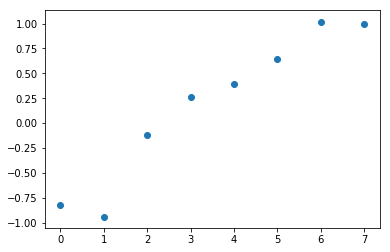

In [4]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)

#### Define *variables* -- the model parameters we'll learn -- and initialize them with "random" values 

In [5]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

#### One single point at a time, define the error between the true label and the model's prediction of the label

In [6]:
# total_error = 0.0
# for x,y in zip(xs, ys):
#     y_model = m*x + b # the predicted model output; often called y_hat, but we'll use that later in notebook
#     total_error += (y-y_model)**2 # sum of squared error between true and predicted y; the "cost" to be minimized

In [7]:
ys_model = m*xs+b
total_error = tf.reduce_sum((ys-ys_model)**2) # use an op to calculate SSE across all values instead of one by one

#### Define optimizer as SSE-minimizing gradient descent

In [8]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error) 
# illustrate learning rate too high: 
# optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(total_error) 
# optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(total_error) 

#### Define an operator that will initialize the graph with all available global variables

In [9]:
initializer_operation = tf.global_variables_initializer()

####  With the computational graph designed, we initialize a session to execute it


In [10]:
with tf.Session() as session:
    
    session.run(initializer_operation) 
    
    n_epochs = 1000 # run notebook through with 10, then run again with 1000
    for iteration in range(n_epochs):
        session.run(optimizer_operation) # this line executes the graph once, taking a single step toward minimizing cost
    
    slope, intercept = session.run([m, b])  # fetch the m and b operators

In [11]:
slope

0.29314372

In [12]:
intercept

-0.84175235

In [13]:
y_hat = intercept + slope*np.array(xs)

In [14]:
pd.DataFrame(list(zip(ys, y_hat)), columns=['y', 'y_hat'])

,y,y_hat
0,-0.82,-0.841752
1,-0.94,-0.548609
2,-0.12,-0.255465
3,0.26,0.037679
4,0.39,0.330823
5,0.64,0.623966
6,1.02,0.917110
7,1.00,1.210254


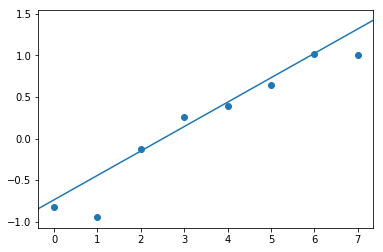

In [15]:
fig, ax = plt.subplots()

ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max-x_min)

ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])